# PHC Prediciton SVM

### Importing The Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import seaborn as sns


### Data Collection and Analysis

#### PHS health dataset

In [65]:
df = pd.read_csv('dataset/clean_sample_data.csv', index_col=0)

#feature cleaning
df['SpO2'] = (df['SpO2'] >= 95.0).astype(int)
df['BloodPressure(sys)'] = (df['BloodPressure(sys)'] <= 120).astype(int)
df['BloodPressure(dia)'] = (df['BloodPressure(dia)'] <= 80).astype(int)
df['pressure'] = df['BloodPressure(sys)'] & df['BloodPressure(dia)']



In [66]:
df.head()

,Age,Gender,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,BodyTemperature,SpO2,BloodPressure(sys),BloodPressure(dia),BloodGlucose,PulseRate,BloodUricAcid,Color,pressure
0,59,1,159.0,52.7,20.85,85.0,80,1.06,95.00,1,0,1,234.0,94,4.3,3,0
1,60,1,164.0,73.9,27.48,95.0,99,0.96,96.26,1,0,1,93.6,62,5.8,2,0
2,58,1,164.0,83.7,31.12,102.0,103,0.99,95.00,1,0,0,133.2,60,7.0,3,0
3,50,0,143.0,45.1,22.05,76.0,89,0.85,97.52,1,1,1,75.6,82,3.6,2,1
4,56,1,160.0,64.9,25.35,87.0,91,0.96,96.44,1,0,0,223.2,92,5.0,3,0


#### Number of Rows and Columns of the dataset

In [67]:
print(f'Row={df.shape[0]}, Column={df.shape[1]}')

Row=271, Column=17


#### Analysing the data

In [68]:
# get statistical measures of this dataframe
df.describe()

,Age,Gender,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,BodyTemperature,SpO2,BloodPressure(sys),BloodPressure(dia),BloodGlucose,PulseRate,BloodUricAcid,Color,pressure
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,49.605166,0.830258,163.051661,67.521402,25.367011,90.242066,94.538745,0.954834,95.842214,0.992620,0.354244,0.435424,128.012546,80.269373,6.621771,2.937269,0.280443
std,7.390372,0.376100,7.442564,10.056410,3.201135,7.791515,6.289716,0.050727,3.728073,0.085748,0.479168,0.496730,56.911955,11.656080,1.533746,0.755066,0.450047
min,34.000000,0.000000,140.000000,44.200000,18.390000,63.600000,80.000000,0.640000,37.580000,0.000000,0.000000,0.000000,66.600000,51.000000,3.100000,1.000000,0.000000
25%,44.000000,1.000000,158.000000,61.250000,23.265000,85.000000,91.000000,0.930000,95.360000,1.000000,0.000000,0.000000,90.000000,72.000000,5.700000,2.000000,0.000000
50%,50.000000,1.000000,164.000000,67.500000,25.150000,90.000000,94.000000,0.960000,96.260000,1.000000,0.000000,0.000000,111.600000,80.000000,6.600000,3.000000,0.000000
75%,55.000000,1.000000,168.000000,73.400000,26.860000,95.000000,98.000000,0.990000,96.800000,1.000000,1.000000,1.000000,142.200000,88.000000,7.600000,3.000000,1.000000
max,77.000000,1.000000,184.000000,114.400000,40.530000,118.000000,127.000000,1.110000,98.420000,1.000000,1.000000,1.000000,392.400000,123.000000,11.000000,4.000000,1.000000


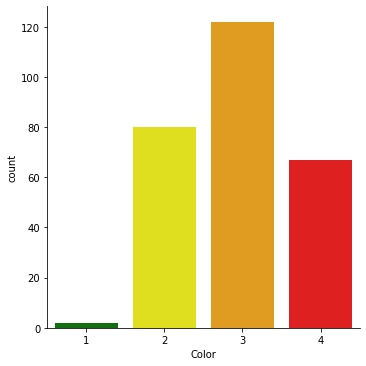

In [69]:
# number of values for each values
sns.catplot(x='Color', data=df, kind = 'count', palette={1:"green", 2:"yellow", 3:'orange', 4:'red'})

1 --> Green

2 --> Yellow

3 --> Orange

4 --> Red

In [70]:
df.groupby('Color').mean()

,Age,Gender,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,BodyTemperature,SpO2,BloodPressure(sys),BloodPressure(dia),BloodGlucose,PulseRate,BloodUricAcid,pressure
Color,,,,,,,,,,,,,,,,
1,43.000000,1.000000,160.000000,59.550000,23.145000,79.00000,89.500000,0.880000,95.450000,1.000000,0.500000,0.000000,108.000000,66.000000,5.000000,0.000000
2,48.162500,0.862500,163.875000,66.701250,24.813125,89.13750,93.937500,0.949375,96.235250,1.000000,0.412500,0.612500,105.142500,79.737500,5.786250,0.362500
3,50.319672,0.844262,162.934426,67.154098,25.281066,89.97541,94.147541,0.956230,95.541475,0.991803,0.286885,0.311475,134.940984,81.311475,6.370492,0.213115
4,50.223881,0.761194,162.373134,69.407463,26.251194,92.38209,96.119403,0.961045,95.932239,0.985075,0.402985,0.462687,143.301493,79.432836,8.125373,0.313433


In [71]:
# seperating data and labels
df = df.dropna()
# data = df.drop(['Color', 'blood_hemoglobin'], axis=1)
data = df.drop(['Color', 'Height', 'Weight', 'Hip', 'BloodPressure(sys)', 'BloodPressure(dia)'], axis=1)

label = df.Color

### Data Standardization

### Training and Testing Data Split

In [72]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, stratify=label, random_state=1)

In [73]:
# data scaling
sc = StandardScaler()
data_train = sc.fit_transform(data_train)
data_test = sc.transform(data_test)
print(data.shape ,data_train.shape, data_test.shape)

(271, 11) (216, 11) (55, 11)


### Training The Model

In [74]:
# loading model
classifier = svm.SVC(kernel = 'linear')

In [75]:
# training the SVM Classifier

classifier.fit(data_train, label_train)

SVC(kernel='linear')

### Model Evaluation

#### Finding the accuracy score

In [76]:
# accuracy score on the training data
data_train_prediction = classifier.predict(data_train)
data_train_accuracy = accuracy_score(data_train_prediction, label_train)
print(data_train_accuracy)

0.7685185185185185


In [77]:
# accuracy score on the testing data
data_test_prediction = classifier.predict(data_test)
data_test_accuracy = accuracy_score(data_test_prediction, label_test)
print(round(data_test_accuracy*100,2))

67.27


### Making Predictive System

In [56]:
# input_data = (-0.65831098, -0.40905835,  2.4784788 ,  0.59274898, -0.83205029,
#         0.88968025, -0.85096294, -0.21821789,  2.4784788 , -0.14285714,
#        -0.74654051,  1.23812892,  0.33333333, -0.81415234,  0.32539569,
#         0.63599873, -0.57206323,  0.11299412, -1.14203056, -0.44492793,
#        -0.62279395, -0.92812321, -0.14285714, -0.14285714, -0.09712859,
#         2.55188353, -0.97834288)

# # changing the input_data to numpy array
# input_to_numpy = np.asarray(input_data)

# # reshaping input_to_numpy 
# input_reshaped = input_to_numpy.reshape(1, -1)

# #standardize the input_data
# std_data = scaler.transform(input_reshaped)
# print(std_data)

In [57]:
# #prediction

# prediction = classifier.predict(std_data)
# if(prediction[0] == 1):
#     print('Green')
    
# elif(prediction[0] == 2):
#     print('Yellow')
    
# elif(prediction[0] == 3):
#     print('Orange')

# else:
#     print('Red')
    
# print(prediction)